# Data Manipulation Part 1: Groupby Operations

Data manipulation with Pandas is a way to describe the kind of analytics you have at your command with some very accessible pandas syntax, for doing the following kinds of tasks:

* Split a pandas object into pieces using one or more keys (in the form of functions, arrays, or DataFrame column names)
* Computing group summary statistics, like count, mean, or standard deviation, or a user-defined function
* Apply a varying set of functions to each column of a DataFrame
* Apply within-group transformations or other manipulations, like normalization, linear regression, rank, or subset selection
* Compute pivot tables and cross-tabulations
* Perform quantile analysis and other data-derived group analyses

#### Figure 9.1 depicts the main groupby elements

<img src='img/groupby.png' height="1000" width="600">

Grouping keys can use any of these forms:

* A list or array of values that is the same length as the axis being grouped
* A value indicating a column name in a DataFrame
* A dict or Series giving a correspondence between the values on the axis being grouped and the group names
* A function to be invoked on the axis index or the individual labels in the index

Let's try some of the Groupby methods on the data we used last time.

In [120]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})

First we use the DataFrame column 'key1' to group the data.

In [121]:
grouped = df.groupby('key1')
grouped

Computing means on the grouped data object gives us group level means for observations matching each key value.

In [122]:
grouped.mean()

,data1,data2
key1,,
a,0.602343,-0.524066
b,-0.066762,0.078622


Here is an example, using a new object we construct as a list of the same length as the axis being grouped:

In [123]:
key3 = ['x','x','x','y','y']
grouped = df.groupby(key3)

In [124]:
grouped.mean()

,data1,data2
x,0.335146,-0.110685
y,0.334034,-0.541450


If we use two keys we get a heirarchical key grouping:

In [125]:
grouped = df.groupby(['key1', 'key2'])
grouped.mean()

data1     data2
key1 key2                    
a    one  -0.032768 -0.547520
     two   1.872565 -0.477159
b    one  -0.337242  0.425005
     two   0.203719 -0.267761

You can change the presentation of the results with the 'unstack' method, like so:

In [126]:
grouped.mean().unstack()

data1               data2          
key2       one       two       one       two
key1                                        
a    -0.032768  1.872565 -0.547520 -0.477159
b    -0.337242  0.203719  0.425005 -0.267761

Or just analyze one data column.

In [127]:
grouped['data1'].mean().unstack()

key2,one,two
key1,,
a,-0.032768,1.872565
b,-0.337242,0.203719


Apparently the syntax is somewhat flexible about how to specify this:

In [128]:
grouped.mean()['data1'].unstack()

key2,one,two
key1,,
a,-0.032768,1.872565
b,-0.337242,0.203719


In [129]:
grouped.mean().unstack()['data1']

key2,one,two
key1,,
a,-0.032768,1.872565
b,-0.337242,0.203719


For those of you familiar with PivotTables in Excel, you might think the above results look like PivotTables.  No coincidence.  Pandas provides an alternative way to use the groupby operations that is called pivot_table:

In [130]:
df.pivot_table(index='key1', columns='key2', values='data1')

key2,one,two
key1,,
a,-0.032768,1.872565
b,-0.337242,0.203719


Mean is the default agg operation, but you can use others:

And we can combine different types of groupby objects. In this example, DataFrame columns and a list:

In [131]:
grouped = df.groupby(['key1', 'key2', key3])
grouped.mean()

data1     data2
key1 key2                      
a    one  x -0.529886 -0.279902
          y  0.464350 -0.815138
     two  x  1.872565 -0.477159
b    one  x -0.337242  0.425005
     two  y  0.203719 -0.267761

Below are the optimized groupby methods, like mean, that you can use.  You can extend these with your own functions, but these are built-in and optimized for computational performance on larger datasets.

#### Table 9-1. Optimized groupby methods ####
| Function Name | Description |
|---|--------------------------|
| count | Number of non-NA values in the group
| sum | Sum of non-NA values
| mean | Mean of non-NA values
| median | Arithmetic median of non-NA values
| std, var | Unbiased (n - 1 denominator) standard deviation and variance 
| min, max | Minimum and maximum of non-NA values
| prod | Product of non-NA values
| first, last | First and last non-NA values

In [132]:
df.pivot_table(index='key1', columns='key2', values='data1', aggfunc=max)

key2,one,two
key1,,
a,0.464350,1.872565
b,-0.337242,0.203719


In [133]:
grouped = df.groupby(['key1'])

In [134]:
grouped.sum()

,data1,data2
key1,,
a,1.807028,-1.572199
b,-0.133523,0.157243


These functions (and your own) can be put into a list, and used with the 'agg' method to get specific results you want.

In [135]:
function_list = ['count', 'mean', 'min', 'max']
grouped.agg(function_list)

data1                                data2                              
      count      mean       min       max  count      mean       min       max
key1                                                                          
a         3  0.602343 -0.529886  1.872565      3 -0.524066 -0.815138 -0.279902
b         2 -0.066762 -0.337242  0.203719      2  0.078622 -0.267761  0.425005

You can define your own functions, and use them in these agg operations

In [136]:
def max_min(x):
    return x.max() - x.min()

In [137]:
function_list = ['count', 'mean', 'min', 'max', max_min]
grouped.agg(function_list)

data1                                          data2            \
      count      mean       min       max   max_min  count      mean   
key1                                                                   
a         3  0.602343 -0.529886  1.872565  2.402450      3 -0.524066   
b         2 -0.066762 -0.337242  0.203719  0.540961      2  0.078622   

                                    
           min       max   max_min  
key1                                
a    -0.815138 -0.279902  0.535236  
b    -0.267761  0.425005  0.692766

You can of course also use pandas to plot results of groupby operations.

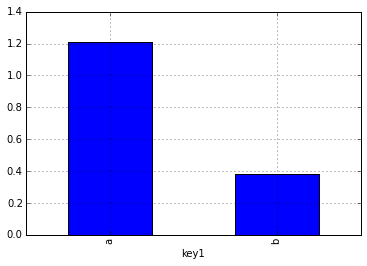

In [138]:
grouped['data1'].std().plot(kind='bar')

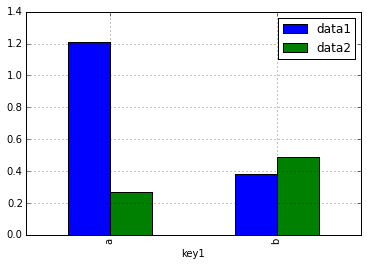

In [139]:
grouped.std().plot(kind='bar')

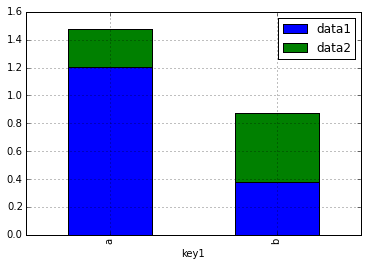

In [140]:
grouped.std().plot(kind='bar', stacked=True)

How does this work when we use two keys to groupby?

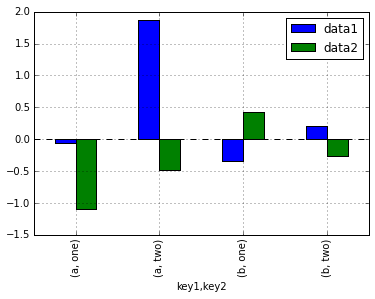

In [141]:
grouped = df.groupby(['key1', 'key2'])
grouped.sum().plot(kind='bar')

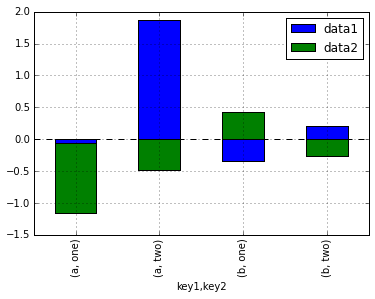

In [142]:
grouped.sum().plot(kind='bar', stacked=True)

## Back to Real Data

OK, so the best way to practice and get comfortable with these tooks is to use them on real data.  Let's get some practice with the rent_bay_filtered.csv dataset.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
rents = pd.read_csv('data/rent_bay_filtered.csv').dropna()

In [2]:
for name in rents.columns:
    print name+',',

Unnamed: 0, neighborhood, title, price, bedrooms, pid, longitude, subregion, link, latitude, sqft, month, day, year, blockfips, countyfips, county_x, tractfips, logrecno, fipsblock, state, county_y, tract, blkgrp, block, arealand, P0010001, H00010001, outlier, view, walk,


OK, one advanced topic before turning you loose on the data.  In this case, we want to compute group-level variables that are a transformation of the data.  We'll compute a z-score for each group and add it to the table of results.  Z-scored normalize by the standard error, so the resulting standard errors are 1.

This example uses list comprehension.

In [3]:
cols = ['price', 'sqft', 'bedrooms']
grouping_col = ['county_x']
rent = rents[grouping_col + cols]
grouped = rent.groupby(grouping_col)
zscore = lambda x: (x - x.mean()) / x.std()
rent[[ 'z_' + col for col in cols]] = grouped.transform(zscore)
rent.head()

,county_x,price,sqft,bedrooms,z_price,z_sqft,z_bedrooms
7,San Francisco,3055,564,1,-0.475306,-0.882205,-0.556439
8,San Francisco,4570,1098,2,0.412493,0.121976,0.435474
11,San Francisco,3080,725,1,-0.460656,-0.579446,-0.556439
13,San Francisco,3300,830,1,-0.331735,-0.381995,-0.556439
16,San Francisco,2950,900,1,-0.536837,-0.250361,-0.556439


In [4]:
rent.groupby(grouping_col).mean()

,price,sqft,bedrooms,z_price,z_sqft,z_bedrooms
county_x,,,,,,
Alameda,2161.513369,1189.294118,2.096257,-8.311830e-18,6.204187e-17,3.324732e-17
Contra Costa,1888.291045,1389.156716,2.552239,-1.781328e-17,-7.622427e-17,-9.279476e-17
Marin,2897.303448,1234.151724,2.075862,2.143879e-17,-1.071939e-16,-3.828355e-17
Napa,2115.183673,1543.306122,2.612245,-1.721979e-16,8.836469e-17,2.786886e-16
San Francisco,3866.094077,1033.135889,1.560976,1.313313e-16,1.170183e-16,-3.028936e-16
San Mateo,2734.673469,1061.089286,1.816327,-3.823472e-17,-8.100097e-17,-1.676663e-16
Santa Clara,2538.766423,1094.065693,1.906934,7.455512e-17,7.759405e-17,-1.150236e-16
Solano,1463.226415,1236.367925,2.584906,-2.503239e-16,-1.173066e-16,-1.466332e-17
Sonoma,1805.551282,1259.679487,2.217949,1.380662e-16,1.184950e-16,-1.403792e-16


In [156]:
rent.groupby(grouping_col).std()

,price,sqft,bedrooms,z_price,z_sqft,z_bedrooms
county_x,,,,,,
Alameda,965.788955,866.792663,1.131816,1,1,1
Contra Costa,647.203537,703.546482,1.223622,1,1,1
Marin,1533.516952,759.099287,1.161194,1,1,1
Napa,703.422783,643.132996,1.095756,1,1,1
San Francisco,1706.465650,531.776603,1.008154,1,1,1
San Mateo,992.107790,520.472208,0.979033,1,1,1
Santa Clara,1026.847074,583.595512,0.997486,1,1,1
Solano,393.304082,414.319645,1.085558,1,1,1
Sonoma,684.739332,782.577915,1.055217,1,1,1


## OK, now back to basics.  Your turn to work with groupby.

Generate a groupby object called 'grouped' grouping on county_x

In [5]:
gr = rents.groupby('county_x')

Now compute the mean price for each county_x

In [6]:
mean_prices = gr['price'].mean()

Plot this as a bar chart

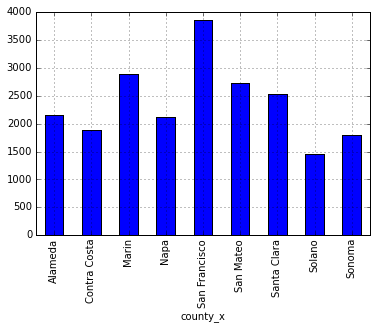

In [7]:
mean_prices.plot(kind='bar')

Compute the maximum price per county_x

In [8]:
max_prices = gr['price'].max()

Plot this as a horizontal bar chart

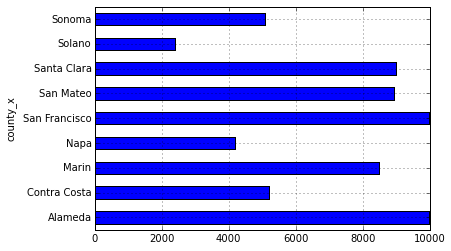

In [10]:
max_prices.plot(kind='barh')

Compute a groupby object using county, and within county_x, by number of bedrooms.

In [12]:
gr2 = rents.groupby(['county_x', 'bedrooms'])

Compute the mean price and sqft in each groupby value (county_x and bedroom)

In [13]:
means = gr2[['price', 'sqft']].mean()

Use the 'unstack' method to present the results as a two-dimensional table

In [16]:
means = means.unstack()

Plot this as a horizontal bar chart (increase figsize to 10,10 to make this legible)

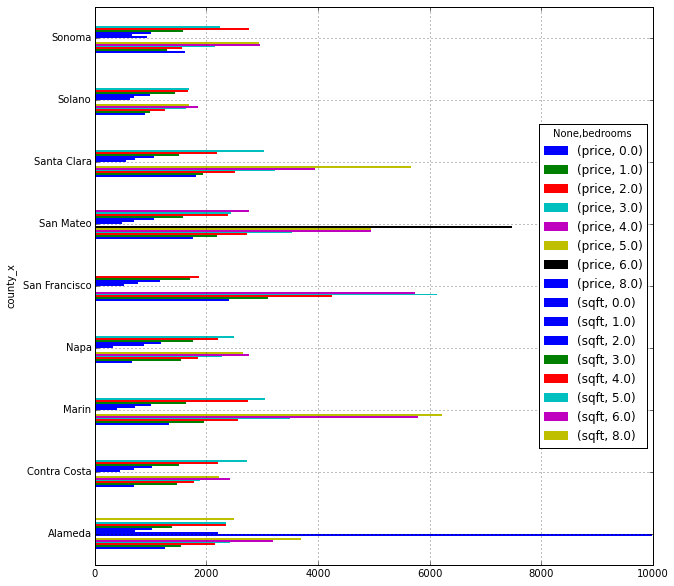

In [19]:
means.plot(kind='barh', edgecolor='None', figsize=(10,10))

Do the same tabulation (no plot), but presenting the 10th percentile values instead of means

In [21]:
gr2[['price', 'sqft']].quantile(0.9)

price    sqft
county_x      bedrooms                
Alameda       0         1510.8  7500.0
              1         1855.0   840.0
              2         2929.0  1214.0
              3         3191.4  1791.7
              4         3565.0  2873.2
              5         5197.0  3440.0
              8         9995.0  2500.0
Contra Costa  0          695.0   450.0
              1         1861.8   810.4
              2         2384.4  1254.8
              3         2503.5  1849.0
              4         3437.0  2757.8
              5         2583.5  3319.5
Marin         0         1495.0   460.0
              1         2514.0   884.0
              2         3620.0  1205.0
              3         4950.0  2028.0
              4         7950.0  3397.0
              5         8120.0  3460.0
Napa          0          668.0   366.4
              1         2160.0  1100.0
              2         2250.0  1579.5
              3         2840.0  2400.0
              4         3060.0  2760.0
              5         2650.0  2502.0
San Francisco 0         3124.0   589.5
              1         3900.0  1000.0
              2         5995.0  1500.0
              3         9375.0  2350.0
              4         8345.0  2300.0
San Mateo     0         2183.0   600.0
              1         2711.0   850.0
              2         3293.0  1250.0
              3         4643.4  1950.0
              4         8000.0  3000.0
              5         6950.0  2805.0
              6         7475.0  2770.0
Santa Clara   0         2675.0   622.8
              1         2361.5   860.3
              2         3292.8  1215.6
              3         4840.0  1896.4
              4         5810.0  2918.7
              5         7500.0  3535.0
Solano        0         1215.4   816.0
              1         1248.0   792.0
              2         1539.5  1167.2
              3         1868.0  1704.8
              4         2256.0  1997.2
              5         1938.5  1816.4
Sonoma        0         2245.0  1430.0
              1         1485.2   851.8
              2         1896.6  1367.5
              3         2840.0  2035.8
              4         4680.0  5134.0
              5         3210.0  2576.1

Do the same, but use describe to get the full statistical profile 

In [22]:
gr2[['price', 'sqft']].describe()

price         sqft
county_x bedrooms                                
Alameda  0        count     8.000000     8.000000
                  mean   1253.875000  2206.875000
                  std     325.730141  3269.982457
                  min     650.000000   200.000000
                  25%    1087.500000   393.750000
                  50%    1397.500000   552.500000
                  75%    1500.000000  2343.750000
                  max    1536.000000  7500.000000
         1        count    47.000000    47.000000
                  mean   1544.297872   716.234043
                  std     277.325418   140.061200
                  min     825.000000   500.000000
                  25%    1387.500000   650.000000
                  50%    1575.000000   701.000000
                  75%    1742.500000   777.000000
                  max    2065.000000  1275.000000
         2        count    76.000000    76.000000
                  mean   2160.250000  1024.342105
                  std     683.561616   240.547074
                  min    1164.000000   530.000000
                  25%    1837.500000   865.250000
                  50%    2000.000000   973.000000
                  75%    2350.750000  1120.000000
                  max    6000.000000  2200.000000
         3        count    40.000000    40.000000
                  mean   2424.900000  1388.175000
                  std     592.837497   273.663736
                  min    1150.000000   865.000000
                  25%    2087.250000  1181.500000
                  50%    2350.000000  1400.000000
...                              ...          ...
Sonoma   2        std     277.942989   226.862143
                  min    1150.000000   580.000000
                  25%    1350.000000   891.000000
                  50%    1500.000000  1000.000000
                  75%    1693.750000  1028.000000
                  max    2249.000000  1742.000000
         3        count    37.000000    37.000000
                  mean   2161.081081  1582.702703
                  std     534.670375   527.924335
                  min    1550.000000   950.000000
                  25%    1750.000000  1293.000000
                  50%    2000.000000  1456.000000
                  75%    2400.000000  1700.000000
                  max    3900.000000  4000.000000
         4        count    14.000000    14.000000
                  mean   2962.500000  2766.142857
                  std     982.576578  1350.843033
                  min    2200.000000  1350.000000
                  25%    2356.250000  2097.000000
                  50%    2600.000000  2200.000000
                  75%    2850.000000  2800.000000
                  max    5100.000000  5620.000000
         5        count     4.000000     4.000000
                  mean   2948.750000  2252.500000
                  std     331.420554   412.567974
                  min    2500.000000  1700.000000
                  25%    2871.250000  2056.250000
                  50%    2997.500000  2360.500000
                  75%    3075.000000  2556.750000
                  max    3300.000000  2589.000000

[440 rows x 2 columns]

Do the same, presenting the count of how many nonmissing price values there are in each group

In [23]:
gr2[['price', 'sqft']].count()

price  sqft
county_x      bedrooms             
Alameda       0             8     8
              1            47    47
              2            76    76
              3            40    40
              4            10    10
              5             5     5
              8             1     1
Contra Costa  0             1     1
              1            28    28
              2            45    45
              3            24    24
              4            28    28
              5             8     8
Marin         0             9     9
              1            39    39
              2            50    50
              3            31    31
              4            11    11
              5             5     5
Napa          0             2     2
              1             5     5
              2            14    14
              3            18    18
              4             9     9
              5             1     1
San Francisco 0            38    38
              1           110   110
              2            91    91
              3            36    36
              4            12    12
San Mateo     0            21    21
              1           131   131
              2           168   168
              3            49    49
              4            18    18
              5             4     4
              6             1     1
Santa Clara   0            17    17
              1           188   188
              2           222   222
              3            82    82
              4            28    28
              5            11    11
Solano        0             3     3
              1            15    15
              2            28    28
              3            39    39
              4            19    19
              5             2     2
Sonoma        0             4     4
              1            35    35
              2            62    62
              3            37    37
              4            14    14
              5             4     4

Define a function called 'q75_q25' that computes the difference between the 75th percentile and the 25th percentile, and analyze this value in the groupby

In [29]:
def q75_q25(x):
    return x.quantile(0.75)-x.quantile(0.25)

In [30]:
gr2.agg(q75_q25)

H00010001  P0010001  Unnamed: 0     arealand  blkgrp  \
county_x      bedrooms                                                         
Alameda       0             68.50    160.75      206.25      3875.75    1.25   
              1            203.50    477.00      313.50     80951.00    1.00   
              2            182.25    450.00      374.00     66438.75    2.00   
              3             74.50    162.25      316.25     89642.75    2.00   
              4             57.50    236.25      108.75   1122543.50    1.00   
              5             25.00     32.00      259.00       674.00    1.00   
              8              0.00      0.00        0.00         0.00    0.00   
Contra Costa  0              0.00      0.00        0.00         0.00    0.00   
              1            224.50    381.75      455.00    103756.50    2.00   
              2            189.00    336.00      385.00    105835.00    2.00   
              3            114.25    301.00      371.00    100900.00    2.00   
              4             62.00    167.25      427.75     80769.00    2.00   
              5             40.00    152.75      413.25     92070.50    1.25   
Marin         0             29.00    123.00      309.00    178239.00    2.00   
              1            196.50    167.00      282.50    214368.00    1.00   
              2            169.00    309.25      424.00    273517.75    1.00   
              3             96.50    316.50      417.50    217281.00    1.50   
              4             38.00     69.00      387.50    378416.00    1.50   
              5            516.00   1031.00      284.00   1390271.00    2.00   
Napa          0              0.00      0.00        0.50         0.00    0.00   
              1             10.00      0.00      316.00  30019538.00    1.00   
              2             71.50    206.00      204.75     24564.00    2.00   
              3             66.00    143.25      387.50   1316652.50    0.75   
              4            108.00    245.00       87.00    202302.00    2.00   
              5              0.00      0.00        0.00         0.00    0.00   
San Francisco 0            331.75    417.00      251.50      4418.00    1.00   
              1            240.50    346.00      328.50     12857.50    1.00   
              2            137.50    250.00      420.00      8035.50    2.00   
              3             79.75    188.25      512.00      6635.25    1.00   
              4             65.25     80.25      428.50      4508.25    3.00   
San Mateo     0            145.00    236.00      197.00     33686.00    4.00   
              1            196.00    357.00      299.00    107714.50    2.00   
              2            166.50    325.50      293.50     79144.75    2.00   
              3             83.00    200.00      506.00     66796.00    2.00   
              4             37.25    111.75      162.00    114244.75    1.75   
              5             78.50    285.25       30.25    488784.00    0.25   
              6              0.00      0.00        0.00         0.00    0.00   
Santa Clara   0            116.00    208.00     1534.00     19217.00    2.00   
              1            197.75    400.25      790.75     66853.00    2.00   
              2            175.75    385.75      563.00     74347.25    2.00   
              3             94.50    328.75      579.50     48872.75    2.00   
              4             70.50    148.00      551.00     89766.25    2.00   
              5             75.50    172.00     1438.00    414410.50    2.00   
Solano        0             48.00    140.00      137.00     56334.00    0.50   
              1             95.50    275.00      297.50     44846.00    0.50   
              2             86.00    169.25      257.75     41409.00    1.00   
              3             21.00     84.00      294.50     39584.00    1.00   
              4             39.50    105.00      336.50     34231.50    1.00   
              5         

Create a list of functions to apply, using min, median, max, and q75_q25 for price and sqft by county_x, and bedrooms

In [33]:
f = ['min', 'median', 'max', q75_q25]
gr2.agg(f)

Unnamed: 0                         price          \
                               min  median   max  q75_q25    min  median   
county_x      bedrooms                                                     
Alameda       0               1419  1504.5  1893   206.25    650  1397.5   
              1               1141  1591.0  2146   313.50    825  1575.0   
              2               1030  1567.0  2149   374.00   1164  2000.0   
              3               1009  1594.5  2020   316.25   1150  2350.0   
              4               1034  1685.5  1965   108.75   2800  3000.0   
              5               1184  1491.0  2015   259.00   2500  3250.0   
              8               1278  1278.0  1278     0.00   9995  9995.0   
Contra Costa  0               1436  1436.0  1436     0.00    695   695.0   
              1               1007  1442.5  2005   455.00    795  1591.5   
              2               1008  1544.0  2014   385.00    795  1850.0   
              3               1035  1543.5  2076   371.00   1245  1772.5   
              4               1011  1578.5  2147   427.75   1595  2045.0   
              5               1291  1567.0  1895   413.25   1900  2125.0   
Marin         0               1784  2054.0  2366   309.00   1125  1400.0   
              1               1795  2033.0  2722   282.50    975  1862.0   
              2               1741  2196.5  2726   424.00   1665  2335.5   
              3               1742  2299.0  2724   417.50   1671  3290.0   
              4               1979  2330.0  2867   387.50   3000  5850.0   
              5               1792  2171.0  2633   284.00   4200  5700.0   
Napa          0               1922  1922.5  1923     0.50    668   668.0   
              1               1856  2121.0  2344   316.00   1015  1289.0   
              2               1739  2173.0  2380   204.75   1295  1835.0   
              3               1855  2109.5  2634   387.50   1400  2150.0   
              4               1930  2288.0  2368    87.00   2250  2650.0   
              5               2376  2376.0  2376     0.00   2650  2650.0   
San Francisco 0                 26   191.5  1150   251.50   1000  2486.0   
              1                  7   371.5  1229   328.50    850  3027.0   
              2                  8   478.0  1148   420.00   1800  4200.0   
              3                 39   380.0   930   512.00   3000  5200.0   
              4                 82   532.5  1227   428.50   3500  5450.0   
San Mateo     0                 58  2780.0  2949   197.00    995  1800.0   
              1                 56  2693.0  3087   299.00   1250  2150.0   
              2               1249  2700.0  3086   293.50   1877  2700.0   
              3                 64  2729.0  3082   506.00   1500  3400.0   
              4                 74  2919.5  3081   162.00   3500  4085.0   
              5               2947  2995.5  3059    30.25   3500  4149.5   
              6               2809  2809.0  2809     0.00   7475  7475.0   
Santa Clara   0                914  1336.0  3015  1534.00   1150  1825.0   
              1                548  1074.0  3046   790.75    925  1895.0   
              2                552   994.0  3079   563.00   1250  2395.0   
              3                566  1131.5  3075   579.50   1100  3190.0   
              4                575  1029.5  3072   551.00   2450  3400.0   
              5                676  1617.0  3051  1438.00   3000  6100.0   
Solano        0               1402  1433.0  1676   137.00    650   725.0   
              1               1135  1659.0  2009   297.50    715   985.0   
              2               1130  1578.0  2070   257.75    895  1270.0   
              3               1010  1301.0  2072   294.50   1150  1695.0   
              4               1017  1609.0  2150   336.50   1250  1800.0   
              5               1274  1292.0  1310    18.00   1385  1692.5   
Sonoma        0               2101  2239.0  2341    85.50   1050  1450.0

Use the pivot_table syntax to create a table of max prices by county_x by bedrooms

In [38]:
rents.pivot_table(index='county_x', columns='bedrooms', values='price')

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0
county_x,,,,,,,,
Alameda,1253.875000,1544.297872,2160.250000,2424.900000,3197.500000,3689.000000,NaN,9995
Contra Costa,695.000000,1465.428571,1787.666667,1881.000000,2427.500000,2218.125000,NaN,NaN
Marin,1334.444444,1956.358974,2563.340000,3507.548387,5800.000000,6220.000000,NaN,NaN
Napa,668.000000,1550.600000,1857.500000,2277.777778,2766.666667,2650.000000,NaN,NaN
San Francisco,2407.842105,3100.772727,4252.824176,6141.361111,5740.833333,NaN,NaN,NaN
San Mateo,1768.000000,2189.694656,2729.851190,3529.795918,4953.611111,4949.750000,7475,NaN
Santa Clara,1820.941176,1934.521277,2514.918919,3236.292683,3952.142857,5659.090909,NaN,NaN
Solano,904.333333,993.800000,1262.571429,1632.179487,1846.842105,1692.500000,NaN,NaN
Sonoma,1612.500000,1297.000000,1557.919355,2161.081081,2962.500000,2948.750000,NaN,NaN


OK -- now start experimenting with groupby and plotting on your own data